# Mobile App User Engagement Project

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Mobile App User Engagement.csv")

In [9]:
# Display the first few rows to verify
print(df.head())

     User ID  Gender  Age Country Device Type  App Version  Sessions Per Day  \
0  User_1208    Male   43  Canada         iOS          2.0                 8   
1  User_1102  Female   40   India     Android          2.1                 9   
2  User_2594  Female   29   India     Android          1.1                14   
3  User_1092  Female   27  Canada     Android          1.2                 6   
4  User_2735   Other   14  Brazil     Android          2.1                 6   

   Avg Session Duration Min  Screens Viewed  Push Notifications Clicked  \
0                     22.22              32                           5   
1                     45.20              39                           7   
2                     37.68              20                           0   
3                     42.25              16                           8   
4                     39.01              11                           8   

   In App Purchases Subscription Status  Churn Risk Score Last Login

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     20000 non-null  object 
 1   Gender                      20000 non-null  object 
 2   Age                         20000 non-null  int64  
 3   Country                     20000 non-null  object 
 4   Device Type                 20000 non-null  object 
 5   App Version                 20000 non-null  float64
 6   Sessions Per Day            20000 non-null  int64  
 7   Avg Session Duration Min    20000 non-null  float64
 8   Screens Viewed              20000 non-null  int64  
 9   Push Notifications Clicked  20000 non-null  int64  
 10  In App Purchases            20000 non-null  int64  
 11  Subscription Status         20000 non-null  object 
 12  Churn Risk Score            20000 non-null  float64
 13  Last Login Date             200

## Key Metrics:

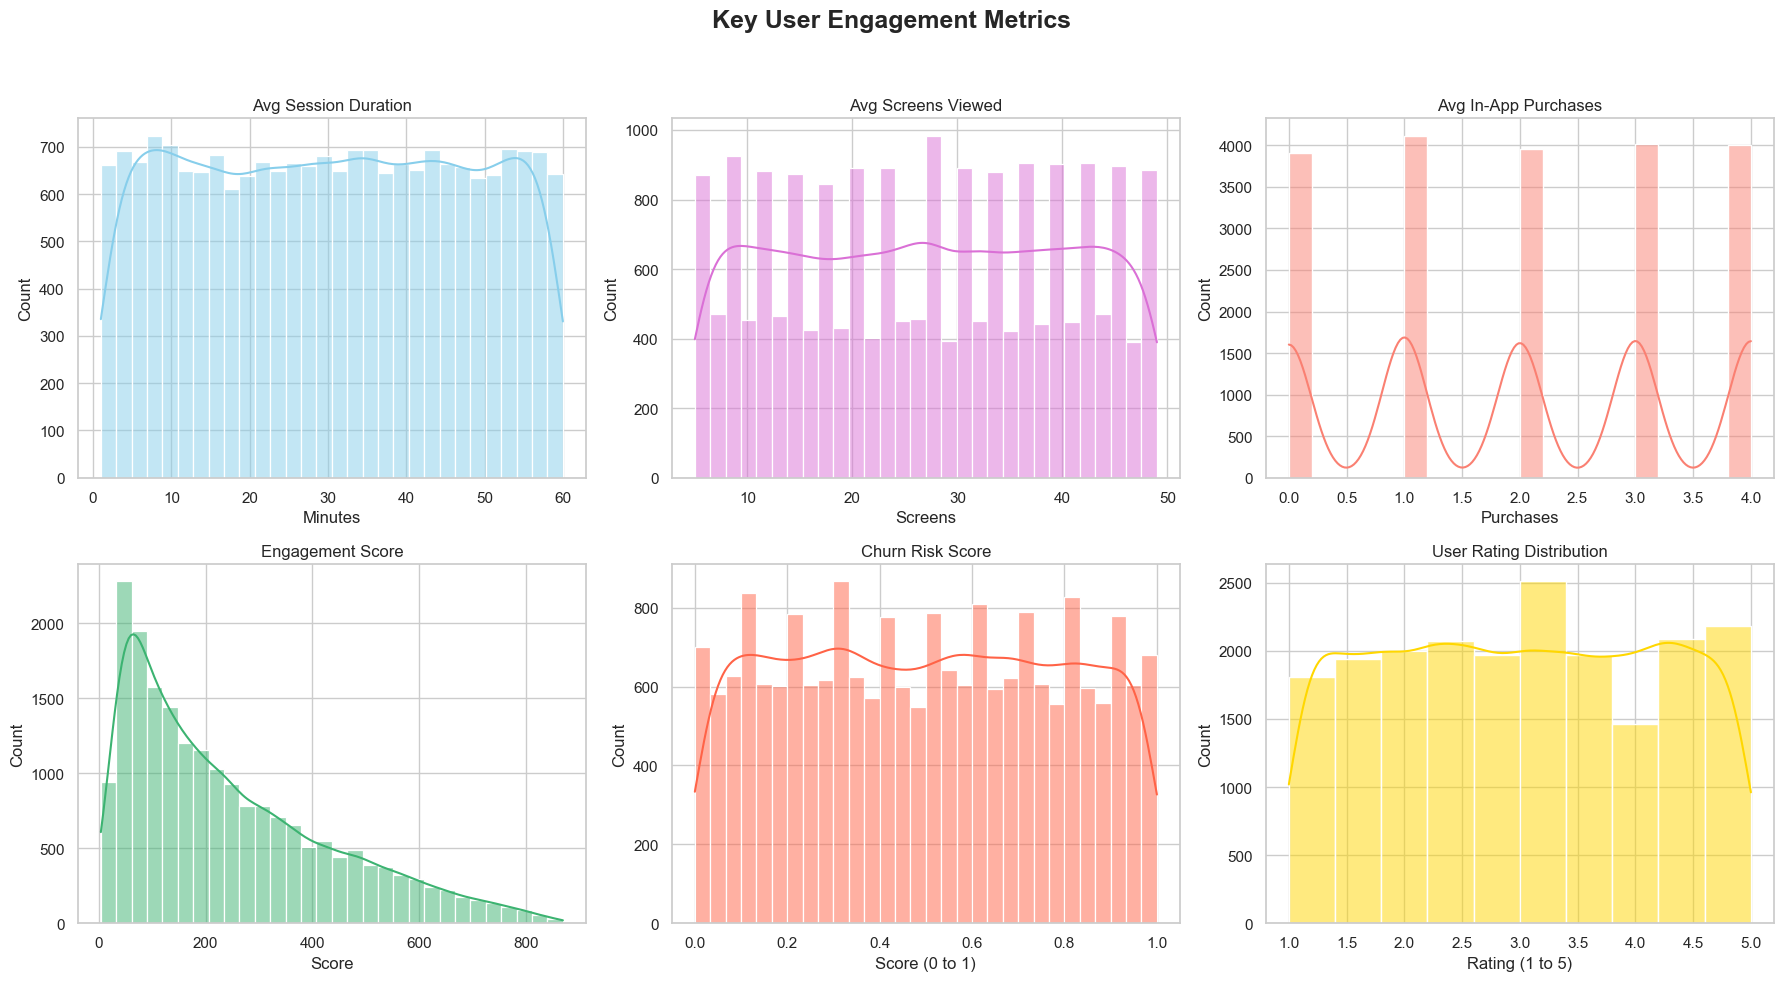

In [40]:
# Visualize Key Metrics: Avg Session Duration, Avg Screens Viewed, Avg In-App Purchases, Engagement Score, Churn Risk Score, User Rating Distribution

# Create Engagement Score
df['Engagement Score'] = (
    df['Sessions Per Day'] * df['Avg Session Duration Min'] +
    df['Screens Viewed'] * 0.5 +
    df['In App Purchases'] * 2
)

# Seaborn style
sns.set(style="whitegrid")

# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Key User Engagement Metrics', fontsize=18, weight='bold')

# 1. Avg Session Duration
sns.histplot(df['Avg Session Duration Min'], bins=30, ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Avg Session Duration')
axes[0, 0].set_xlabel('Minutes')

# 2. Screens Viewed
sns.histplot(df['Screens Viewed'], bins=30, ax=axes[0, 1], color='orchid', kde=True)
axes[0, 1].set_title('Avg Screens Viewed')
axes[0, 1].set_xlabel('Screens')

# 3. In-App Purchases
sns.histplot(df['In App Purchases'], bins=20, ax=axes[0, 2], color='salmon', kde=True)
axes[0, 2].set_title('Avg In-App Purchases')
axes[0, 2].set_xlabel('Purchases')

# 4. Engagement Score
sns.histplot(df['Engagement Score'], bins=30, ax=axes[1, 0], color='mediumseagreen', kde=True)
axes[1, 0].set_title('Engagement Score')
axes[1, 0].set_xlabel('Score')

# 5. Churn Risk Score
sns.histplot(df['Churn Risk Score'], bins=30, ax=axes[1, 1], color='tomato', kde=True)
axes[1, 1].set_title('Churn Risk Score')
axes[1, 1].set_xlabel('Score (0 to 1)')

# 6. User Rating
sns.histplot(df['User Rating'], bins=10, ax=axes[1, 2], color='gold', kde=True)
axes[1, 2].set_title('User Rating Distribution')
axes[1, 2].set_xlabel('Rating (1 to 5)')

# Tight layout and save
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Key_User_Metrics_Dashboard.png", dpi=300)
plt.show() #Save the Figure

## Average Session Duration by Device Type

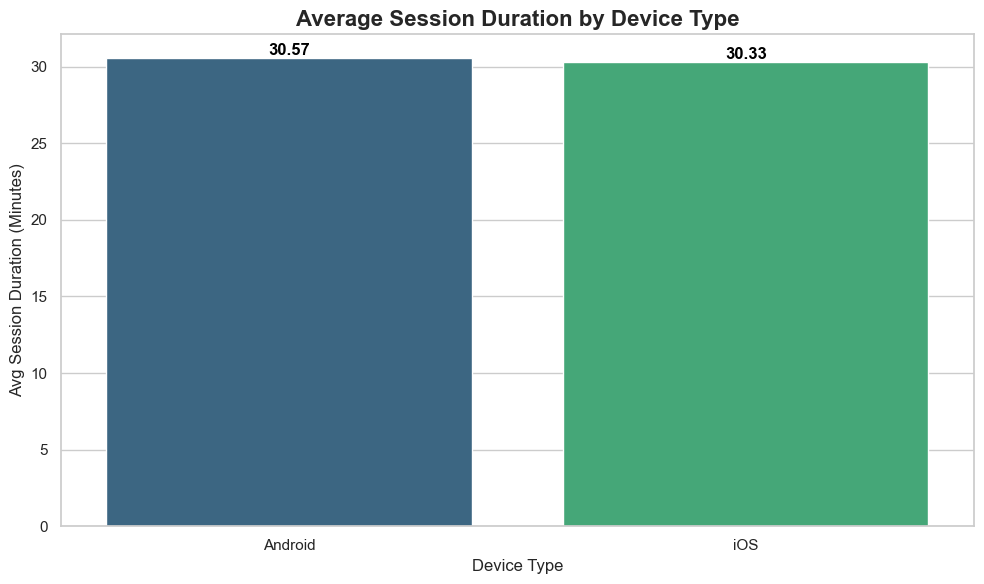

In [20]:
# 1. What is the average session duration by device type?

# Group and calculate average session duration
avg_duration_by_device = df.groupby('Device Type')['Avg Session Duration Min'].mean().reset_index()

# Seaborn style
sns.set(style="whitegrid")

# Plotting with updated hue usage
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=avg_duration_by_device,
    x='Device Type',
    y='Avg Session Duration Min',
    hue='Device Type',  # Added to comply with future version
    palette='viridis',
    legend=False         # Prevents duplicate legend
)

# Add value annotations
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.2f}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Titles and axis labels
plt.title('Average Session Duration by Device Type', fontsize=16, weight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Avg Session Duration (Minutes)', fontsize=12)
plt.tight_layout()

# Save to a valid path
plt.savefig("Avg_Session_Duration_by_Device_Type.png", dpi=300)
plt.show() # Show the Figure

## User Distribution Across App Versions: Who’s Using What?

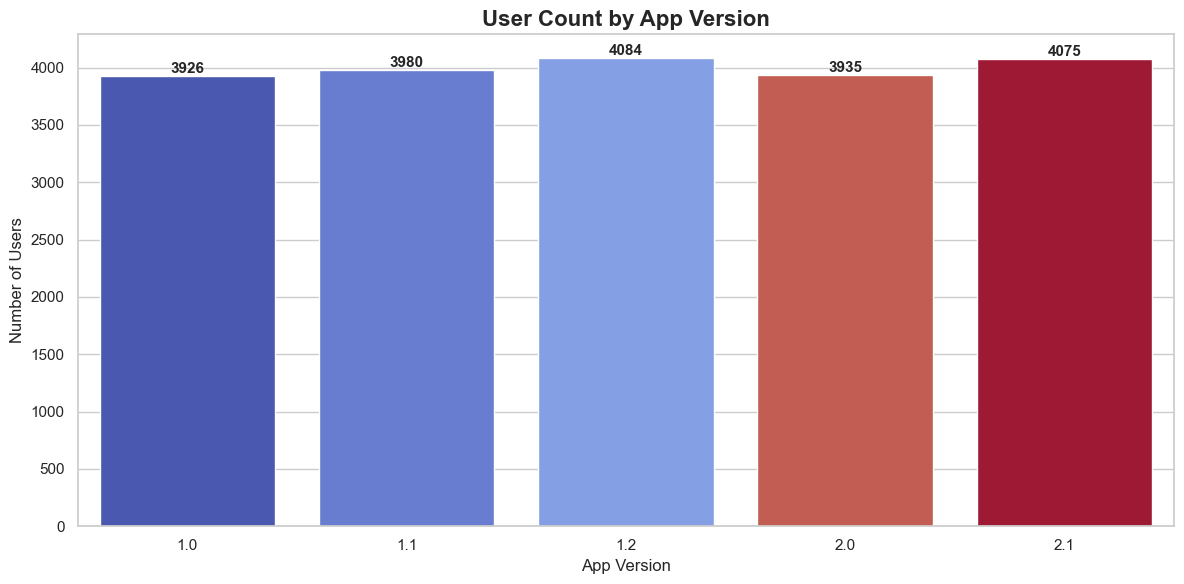

In [21]:
# 2. How many users use each app version?

# Count number of users for each app version
app_version_counts = df['App Version'].value_counts().reset_index()
app_version_counts.columns = ['App Version', 'User Count']
app_version_counts = app_version_counts.sort_values('App Version')

# Seaborn style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=app_version_counts,
    x='App Version',
    y='User Count',
    hue='App Version',          # Added to prevent warning
    palette='coolwarm',
    legend=False
)

# Add value labels
for p in barplot.patches:
    barplot.annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=11, weight='bold')

# Titles and labels
plt.title('User Count by App Version', fontsize=16, weight='bold')
plt.xlabel('App Version', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()

# Save the chart
plt.savefig("User_Count_by_App_Version.png", dpi=300)
plt.show() # Show the Chart

## Country-wise User Engagement: Who’s Most Active Per Day?

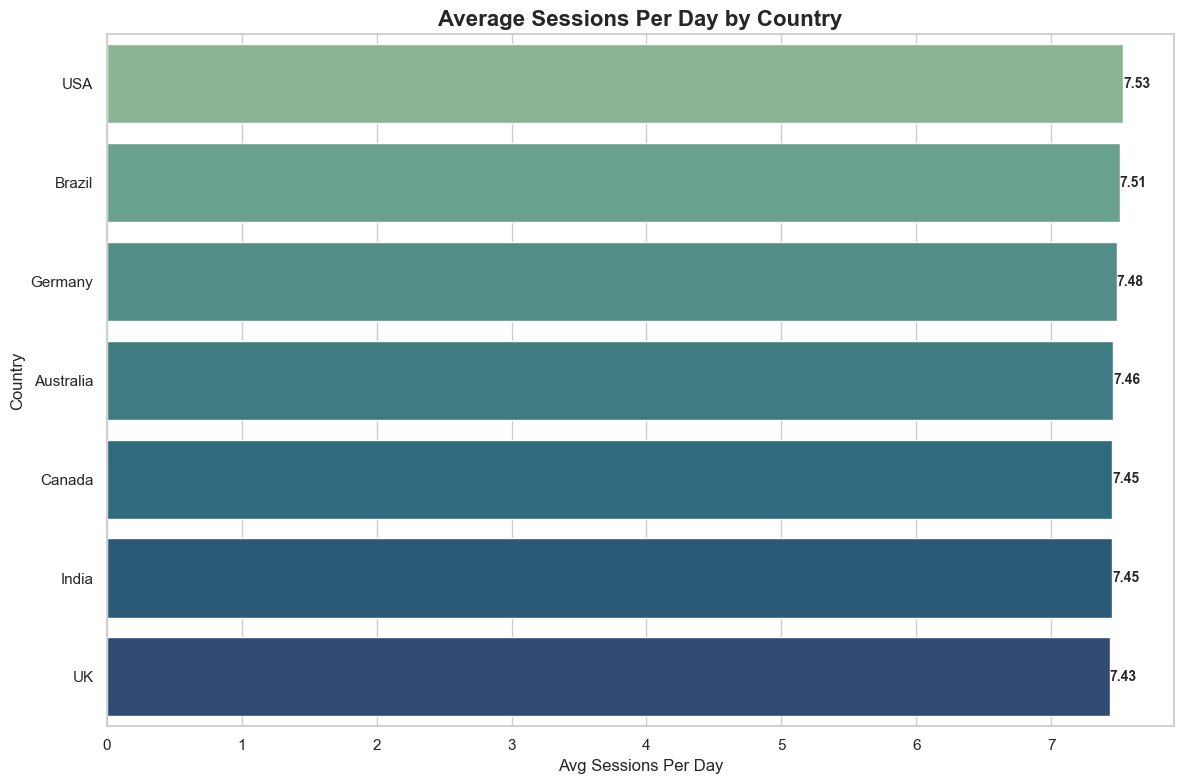

In [22]:
# 3. Which countries have the highest and lowest user engagement (in terms of sessions per day)?

# Group by country and calculate average sessions per day
country_engagement = df.groupby('Country')['Sessions Per Day'].mean().reset_index()
country_engagement = country_engagement.sort_values('Sessions Per Day', ascending=False)

# Seaborn style
sns.set(style="whitegrid")

# Plotting horizontal bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=country_engagement,
    y='Country',
    x='Sessions Per Day',
    palette='crest',
    hue='Country',     # Avoid deprecation warning
    legend=False
)

# Annotate values
for p in barplot.patches:
    barplot.annotate(f"{p.get_width():.2f}",
                     (p.get_width(), p.get_y() + p.get_height() / 2.0),
                     ha='left', va='center', fontsize=10, weight='bold')

# Titles and labels
plt.title('Average Sessions Per Day by Country', fontsize=16, weight='bold')
plt.xlabel('Avg Sessions Per Day', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig("Country_User_Engagement_Sessions_Per_Day.png", dpi=300)
plt.show() # Show the Figure

## Churn Risk Distribution by Subscription Type: Who’s at Risk?

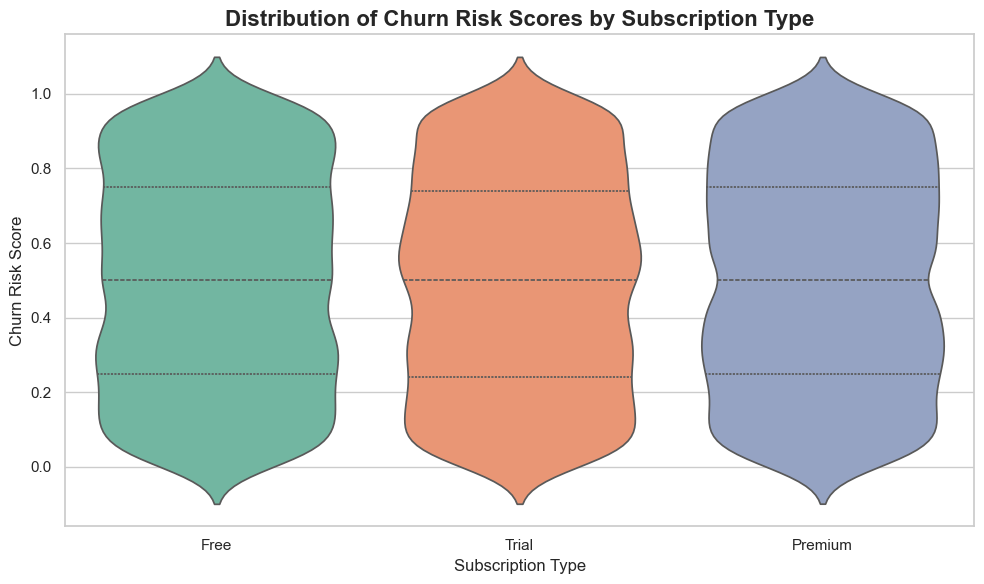

In [27]:
# 4. Distribution of churn risk scores across subscription types:

# Seaborn style
sns.set(style="whitegrid")

# Plotting violin plot with explicit hue to avoid future warnings
plt.figure(figsize=(10, 6))
violin = sns.violinplot(
    data=df,
    x='Subscription Status',
    y='Churn Risk Score',
    hue='Subscription Status',   # Explicitly assigning hue
    palette='Set2',
    inner='quartile',
    legend=False                 # Disabling duplicate legend
)

# Titles and labels
plt.title('Distribution of Churn Risk Scores by Subscription Type', fontsize=16, weight='bold')
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Churn Risk Score', fontsize=12)
plt.tight_layout()

# Save the chart
plt.savefig("Churn_Risk_Distribution_by_Subscription_Type.png", dpi=300)
plt.show() # Show the Figure

## User Engagement by Age Group: Who’s Most Active?

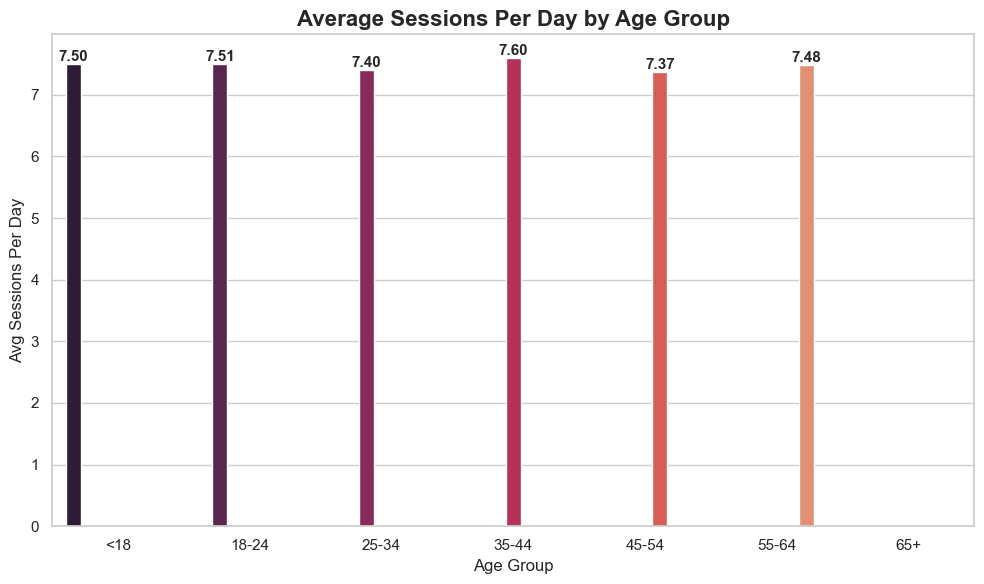

In [30]:
# 5. How does user activity vary with age group?

# Create Age Groups
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by Age Group and calculate average sessions per day
activity_by_age = df.groupby('Age Group', observed=True)['Sessions Per Day'].mean().reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=activity_by_age,
    x='Age Group',
    y='Sessions Per Day',
    hue='Age Group',
    palette='rocket',
    legend=False
)

# Add value labels
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.2f}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=11, weight='bold')

# Titles and labels
plt.title('Average Sessions Per Day by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Avg Sessions Per Day', fontsize=12)
plt.tight_layout()

# Save plot
plt.savefig("User_Activity_by_Age_Group.png", dpi=300)
plt.show() #Show the Figure

## User Subscription Breakdown: Free vs Trial vs Premium

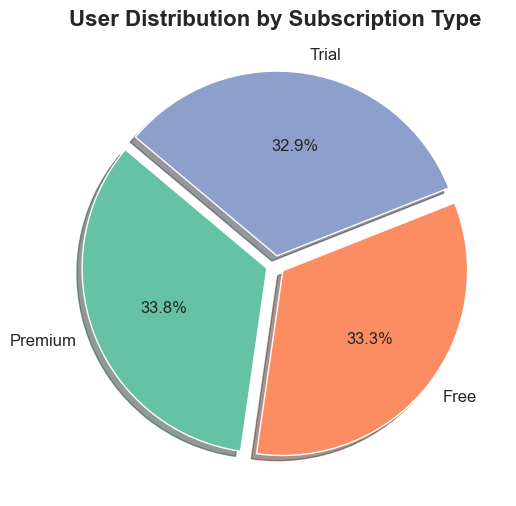

In [32]:
# 6. What percentage of users are on Free, Trial, and Premium?

# Count users by Subscription Status
subscription_counts = df['Subscription Status'].value_counts(normalize=True) * 100
subscription_counts = subscription_counts.round(2)

# Plotting
plt.figure(figsize=(8, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
explode = (0.05, 0.05, 0.05)  # Slightly explode all slices

plt.pie(subscription_counts, 
        labels=subscription_counts.index, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})

# Title
plt.title('User Distribution by Subscription Type', fontsize=16, weight='bold')

# Save the plot
plt.savefig("Subscription_Distribution_Percentage.png", dpi=300)
plt.show() #Show the Figure

## Push Notification Engagement: How Often Do Users Click?

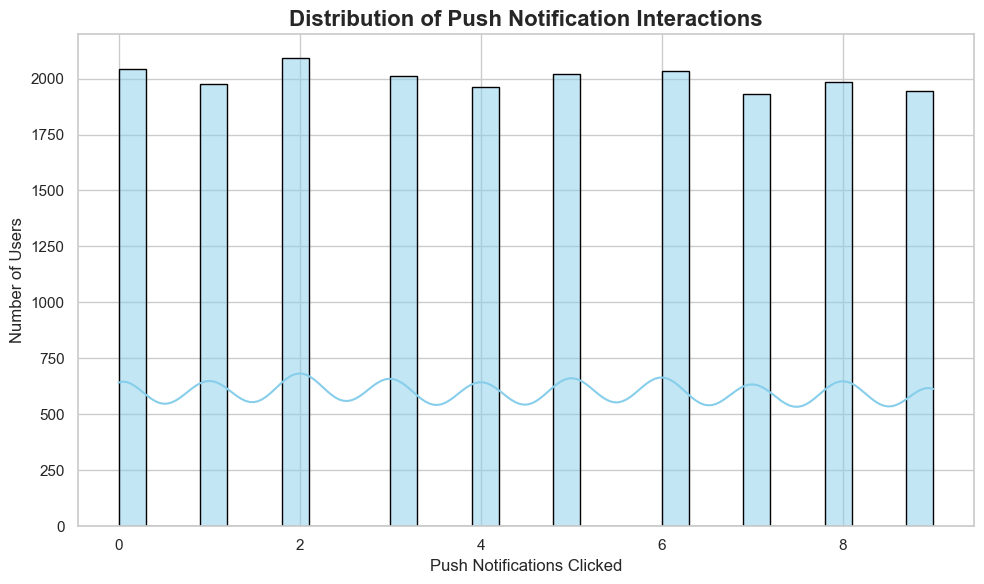

In [33]:
# 7. What’s the distribution of push notification interaction?

# Seaborn style
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
hist = sns.histplot(
    data=df,
    x='Push Notifications Clicked',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Titles and labels
plt.title('Distribution of Push Notification Interactions', fontsize=16, weight='bold')
plt.xlabel('Push Notifications Clicked', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig("Push_Notification_Interaction_Distribution.png", dpi=300)
plt.show() # Show the Figure

## User Login Activity by Month: Tracking Engagement Over Time

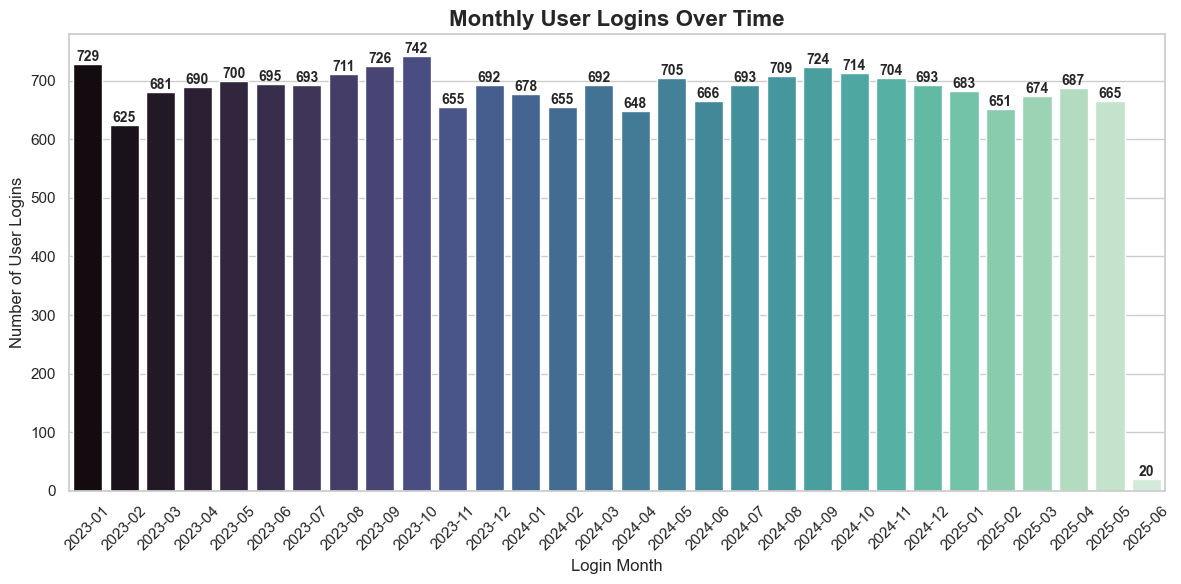

In [37]:
# 8. Time-based Analysis: User logins by month:

# Convert 'Last Login Date' to datetime
df['Last Login Date'] = pd.to_datetime(df['Last Login Date'], errors='coerce')

# Extract login month in "YYYY-MM" format
df['Login Month'] = df['Last Login Date'].dt.to_period('M').astype(str)

# Count users per login month
logins_by_month = df['Login Month'].value_counts().reset_index()
logins_by_month.columns = ['Login Month', 'User Count']
logins_by_month = logins_by_month.sort_values('Login Month')

# Seaborn style
sns.set(style="whitegrid")

# Plotting with hue to silence future warning
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=logins_by_month,
    x='Login Month',
    y='User Count',
    hue='Login Month',     # Fix: add hue
    palette='mako',
    legend=False           # Hide extra legend
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on bars
for p in barplot.patches:
    barplot.annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, weight='bold')

# Titles and axis labels
plt.title('Monthly User Logins Over Time', fontsize=16, weight='bold')
plt.xlabel('Login Month', fontsize=12)
plt.ylabel('Number of User Logins', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig("Monthly_User_Logins.png", dpi=300)
plt.show() #Show the Figure